In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/samsung-review-2019/file.json
/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv
/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv


In [2]:
items = pd.read_csv('/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv')
reviews = pd.read_csv('/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv')

In [3]:
items.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0


In [4]:
reviews.head(3)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


Above, we have two different datasets. One is **items** which contains data about a product, its rating and price. The other one is **reviews** which is a set of data that contains a more detail review. 

# EDA

## Average Rating of Each Brands

In [5]:
items['totalratings'] = [x * y for x, y in zip(items['rating'], items['totalReviews'])]
brands = list(items.brand.value_counts().index)

ratings = []
for b in brands:
    val = items[items['brand'] == b]['totalratings'].sum() / items[items['brand'] == b]['totalReviews'].sum()
    ratings.append(val)
    
df_ratings = pd.DataFrame({'brand':brands, 'rating':ratings})

In [6]:
df_ratings

,brand,rating
0,Samsung,3.758351
1,Motorola,3.733188
2,Apple,3.828472
3,Xiaomi,4.398959
4,Nokia,3.363539
5,Google,3.783270
6,HUAWEI,4.291082
7,Sony,3.734269
8,OnePlus,4.320197
9,ASUS,3.794677


<AxesSubplot:title={'center':'Brand & Their Average Rating'}, xlabel='brand', ylabel='rating'>

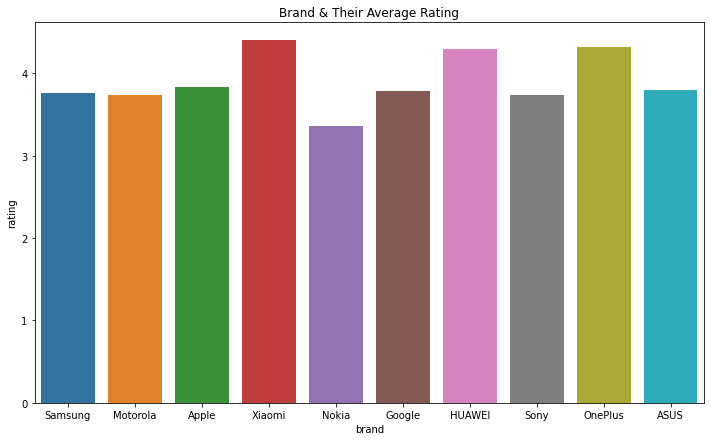

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.title('Brand & Their Average Rating')
sns.barplot(data=df_ratings, x='brand', y='rating')

Above is a graph of the average rating of all phone brands. **We can see that Xiaomi, Huawei and OnePlus are brands that have the highest rating. All of these three companies have one big similarity, they are chinese companies**. It made us question even more about this data right. What made these chinese products so high rated? Why can't other brands have the same average rating as them? We'll find out later.

## Rating Relations with Price

In [8]:
items.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice,totalratings
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,42.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,21.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0,59.4


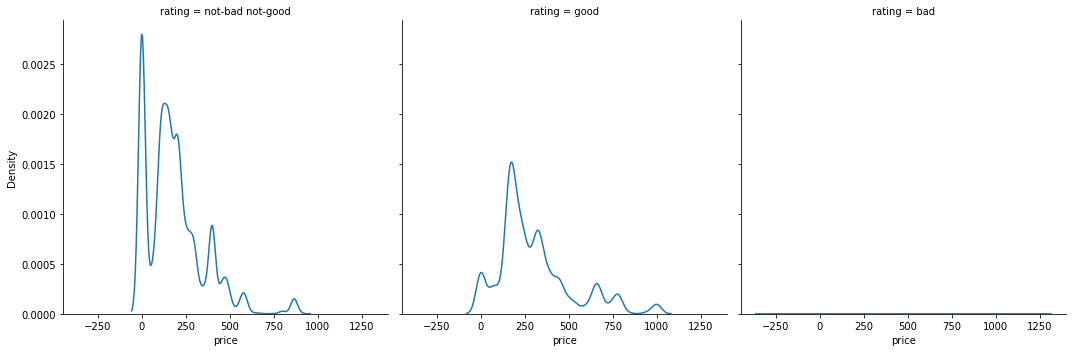

In [9]:
def the_rating(x):
    if x < 2.1:
        y = 'bad'
    elif x > 3.9:
        y = 'good'
    else:
        y = 'not-bad not-good'
    return y

items['rating2'] = [the_rating(x) for x in items['rating']]

prices = []
ratings = []

for i in range(len(items)):
    p, r = items['price'][i], items['rating2'][i]
    for x in range(items['totalReviews'][i]):
        prices.append(p)
        ratings.append(r)
        
df_prices_ratings = pd.DataFrame({'price':prices, 'rating':ratings})
        
sns.displot(data=df_prices_ratings, x='price', col='rating', kind='kde')

As you can see from the graph above, There are not many phone with rating bad (rating with range 0 - 2.1). **Phone with rating not-bad not-good (rating with range 2.1 - 3.9) mostly have cheap price**. 

Above are 

In [11]:
dates = pd.to_datetime(reviews['date'])
reviews['date'] = dates
reviews['year'] = [x.year for x in dates]

<AxesSubplot:xlabel='brand', ylabel='price'>

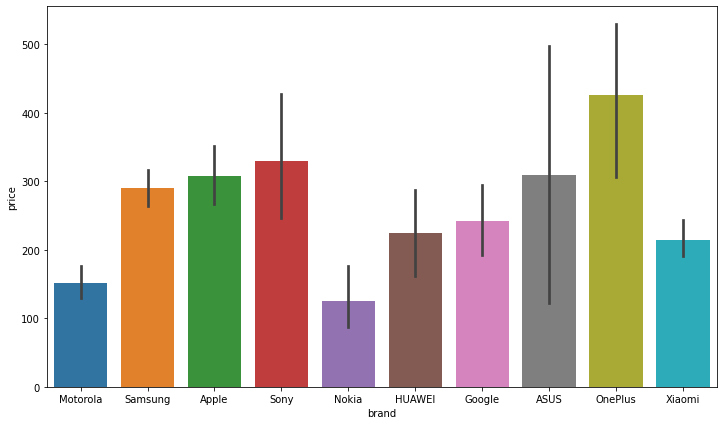

In [12]:
year = []

for x in items.asin:
    y = reviews[reviews.asin == x]['year'].min()
    year.append(y)
    
items['year'] = year

plt.figure(figsize=(12, 7))
sns.barplot(data=items[items.year > 2015], x='brand', y='price')

The graph above showed that OnePlus is the product with the highest price and from the previous graph it is also one of the brand with the highest rating. **Now we can assume that OnePlus is an expensive brand but worth buying**. The other two brands from China, Xiaomi and Huawei, Have lower price than Apple and Samsung, which we can assume as two of phone market leader currently. **With that being said, Huawei and Xiaomi got high rating because their quality exceeds the price**. **If you are looking for high quality phone with affordable price, Xiaomi and Huawei can be the solution.**

In [13]:
year = items['year'].value_counts().index

mean_price = {}
for y in year:
    a = []
    for b in brands:
        a.append(items[(items.brand == b) & (items.year == y)]['price'].mean())
    mean_price[y] = a

<AxesSubplot:xlabel='year', ylabel='mean_price'>

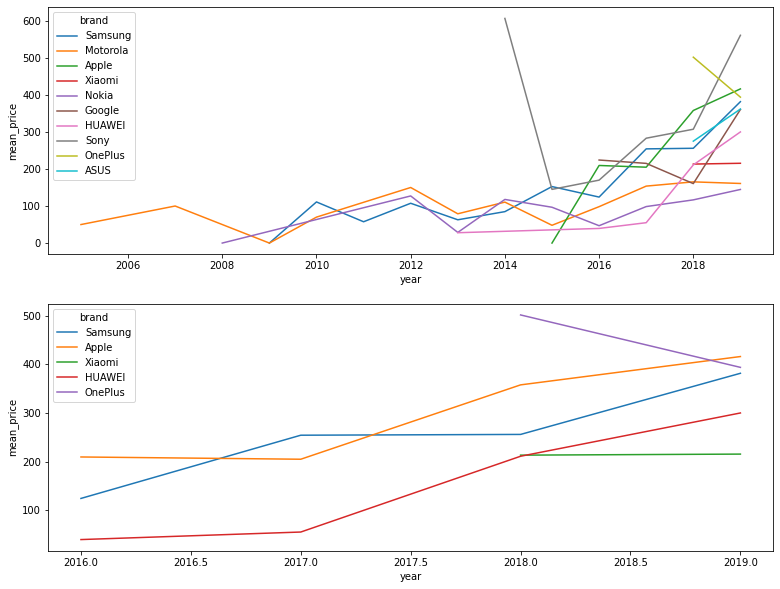

In [14]:
df_mean_price = pd.DataFrame(mean_price)
df_mean_price['brand'] = brands
df_mean_price = pd.melt(df_mean_price, id_vars=['brand'], value_vars=year, var_name='year', value_name='mean_price')

brands = ['Samsung', 'Apple', 'Xiaomi', 'HUAWEI', 'OnePlus']

fig, ax = plt.subplots(2, 1, figsize=(13, 10))
sns.lineplot(data=df_mean_price, x='year', y='mean_price', hue='brand', err_style='band', ax=ax[0])
sns.lineplot(data=df_mean_price[(df_mean_price['brand'].isin(brands)) & (df_mean_price['year'] > 2015)],
             x='year', y='mean_price', hue='brand', err_style='band', ax=ax[1])

The first graph showing the average price of all brands since 2005. The price of each brands look increase every year. The lower graph is a graph showing 5 top brands (Samsung, Apple, Xiaomi, OnePlus, and Huawei) average price since 2016 to 2019. Xiaomi and OnePlus just entered Amazon in 2018

# Building Summary of Complains

In [16]:
reviews.head(3)

,asin,name,rating,date,verified,title,body,helpfulVotes,year
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,2005
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,2004
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,2003


In [ ]:
items.head(3)

In [17]:
from transformers import pipeline

summarizer = pipeline('summarization')

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

In [18]:
items.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice,totalratings,rating2,year
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,42.0,not-bad not-good,2003
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0,21.0,not-bad not-good,2005
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0,59.4,not-bad not-good,2007


In [19]:
samsung_asin = list(items[items.brand == 'Samsung']['asin'])
df_samsung = reviews[(reviews.asin.isin(samsung_asin)) & (reviews.verified == True)
                     & (reviews.rating < 3.1) & (reviews.year == 2019)
                     & (reviews.helpfulVotes.isnull() == False)].reset_index(drop=True)

In [17]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(len(df_samsung)))
complains = []

for text in df_samsung['body']:
    c = summarizer(text)
    complains.append(c[0]['summary_text'])
    progress_bar.update(1)

In [20]:
df_samsung['complain'] = complains

In [21]:
samsung_complains = df_samsung[['asin', 'rating']].merge(items[['asin', 'title']],
                                                         how='left', on='asin').drop(['asin'], axis=1)
samsung_complains['complain'] = complains
samsung_complains['title'] = [x.split(',')[0] for x in samsung_complains['title']]

In [27]:
comps = samsung_complains[samsung_complains.title == 'Samsung Galaxy Note 9 SM-N960U 128GB Ocean Blue - Verizon (Renewed)']['complain']
the_comp = str('')
for c in comps:
    the_comp = the_comp + c

Below is the summary of complains on **Samsung Galaxy Note 9**. Reading this summary will help the related company to fix their products without even reading all the complains. It will save a lot of time, especially if this was applied to all products from every brands. 

>  Clearly has visible scratch from further than 12 inches so already fails Amazon Renewed specifications . Likely to return this unless it functions very well and the scratch on the screen doesn't reflect too much to be noticed throughout the day . Likely going to return it unless it works very well . Item came scratched. Item was scratched. Returning. Item came scratching. Item went missing. Item returned. Item is scratched. Items are scratched. It's scratched. We're scratching. We'll get it back. Item will be scratched. Back to Mail Online home . Back to the page you came from . Phone would not recognize my Verizon sim card, ( I did order a Verizon phone) it imei # was unavailable . Phone would restart over and over. I did factory reset still not working. I will be sending phone back to Verizon . Will be sending it back . Screen protector on phone arrived with a screen protector that didn't fit, wasn't attached properly, and was hiding a significant number of scratches . Spent significant amount of time on the phone with Samsung support, who have advised that the screen is clearly defective . Now I have to drive 45 minutes into town to find a UPS store to return this item, and then wait for them to refund my money .